### Milestone 4

In [80]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix


In [46]:
# Import the csv file 
pcs = pd.read_csv('PCS Illness csv.csv')

In [48]:
pcs.head()

,Program,Sex,Orientation,Race,Veteran,Mental_Illness,TBI,SeriousIllness,Principal Diagnosis Class,Additional Diagnosis Class
0,OUTPATIENT,FEMALE,BISEXUAL,BLACK,NO,YES,NO,NO,MENTAL ILLNESS,MENTAL ILLNESS
1,OUTPATIENT,FEMALE,BISEXUAL,BLACK,NO,YES,NO,NO,MENTAL ILLNESS,MENTAL ILLNESS
2,INPATIENT,FEMALE,LESBIAN OR GAY,BLACK,NO,YES,NO,NO,MENTAL ILLNESS,MENTAL ILLNESS
3,OUTPATIENT,FEMALE,LESBIAN OR GAY,BLACK,NO,YES,NO,NO,MENTAL ILLNESS,MENTAL ILLNESS
4,OUTPATIENT,FEMALE,LESBIAN OR GAY,BLACK,NO,YES,NO,NO,MENTAL ILLNESS,MENTAL ILLNESS


In [50]:
df = pcs

In [70]:
df.columns

Index(['Program', 'Sex', 'Race', 'Veteran', 'Mental_Illness', 'TBI',
       'SeriousIllness', 'Principal Diagnosis Class',
       'Additional Diagnosis Class'],
      dtype='object')

In [71]:
# update the target name
df = df.rename(columns = {'SeriousIllness': 'target'})

In [72]:
# Check how balanced/imbalanced the data is
df['target'].value_counts()

1    57421
2    10823
Name: target, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68244 entries, 0 to 68243
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Program                     68244 non-null  int64
 1   Sex                         68244 non-null  int64
 2   Race                        68244 non-null  int64
 3   Veteran                     68244 non-null  int64
 4   Mental_Illness              68244 non-null  int64
 5   TBI                         68244 non-null  int64
 6   SeriousIllness              68244 non-null  int64
 7   Principal Diagnosis Class   68244 non-null  int64
 8   Additional Diagnosis Class  68244 non-null  int64
dtypes: int64(9)
memory usage: 4.7 MB


In [54]:
# Remove extra column I don't need
df.drop(['Orientation'], axis = 1, inplace = True)

In [51]:
# Convert to numeric values
df['Program'] = df['Program'].replace(['EMERGENCY','INPATIENT','OUTPATIENT','RESIDENTIAL','SUPPORT'],[1,2,3,4,5])
df['Sex'] = df['Sex'].replace(['MALE','FEMALE'],[1,2])
df['Race'] = df['Race'].replace(['BLACK','WHITE','MULTI-RACIAL','OTHER'],[1,2,3,4])
df['Veteran'] = df['Veteran'].replace(['YES','NO'],[1,2])
df['Mental_Illness'] = df['Mental_Illness'].replace(['YES'],[1])
df['SeriousIllness'] = df['SeriousIllness'].replace(['YES','NO'],[1,2])
df['TBI'] = df['TBI'].replace(['YES','NO'],[1,2])
df['Principal Diagnosis Class'] = df['Principal Diagnosis Class'].replace(['MENTAL ILLNESS'],[1])
df['Additional Diagnosis Class'] = df['Additional Diagnosis Class'].replace(['MENTAL ILLNESS','UNKNOWN'],[1,2])


In [75]:
# Check new dataframe
df.head()

,Program,Sex,Race,Veteran,Mental_Illness,TBI,target,Principal Diagnosis Class,Additional Diagnosis Class
0,3,2,1,2,1,2,2,1,1
1,3,2,1,2,1,2,2,1,1
2,2,2,1,2,1,2,2,1,1
3,3,2,1,2,1,2,2,1,1
4,3,2,1,2,1,2,2,1,1


In [100]:
random_seed = 2000
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=random_seed, stratify = df['target'])


In [101]:
# Get the shape of the training and test data
print(df_train.shape)
print(df_test.shape)
print()
print(df_train['target'].value_counts(normalize = True))
print()
print(df_test['target'].value_counts(normalize = True))

(54595, 9)
(13649, 9)

1    0.841414
2    0.158586
Name: target, dtype: float64

1    0.84138
2    0.15862
Name: target, dtype: float64


In [102]:
# Scle the data
scaler = StandardScaler()
scaler.fit(df_train)

def get_features_and_target_arrays(df,scaler):
    X_numeric_scaled = scaler.transform(df)
    X_categorical = df.to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['target']
    return X, y

X, y = get_features_and_target_arrays(df_train, scaler)

In [103]:
# Create the class and fit the logistic regression
clf = LogisticRegression(penalty='none') # logistic regression with no penalty term in the cost function.

clf.fit(X, y)

LogisticRegression(penalty='none')

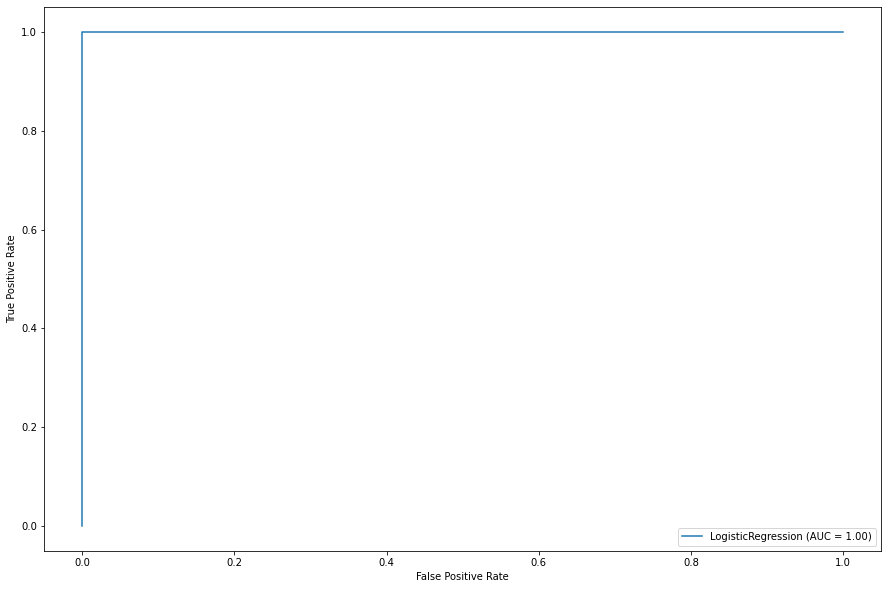

In [117]:
# Model evaluation
# scaled datasets
X_test, y_test = get_features_and_target_arrays(df_test, scaler)
plot_roc_curve(clf, X_test, y_test)

In [106]:

test_prob = clf.predict_proba(X_test)[:, 1]
test_pred = clf.predict(X_test)

In [107]:
# Get the classification report
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.00000
AUC = 1.00000
Average Precision = 0.67406

Using 0.5 as threshold:
Accuracy = 1.00000
Precision = 1.00000
Recall = 1.00000
F1 score = 1.00000

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     11484
           2       1.00      1.00      1.00      2165

    accuracy                           1.00     13649
   macro avg       1.00      1.00      1.00     13649
weighted avg       1.00      1.00      1.00     13649



Confusion Matrix


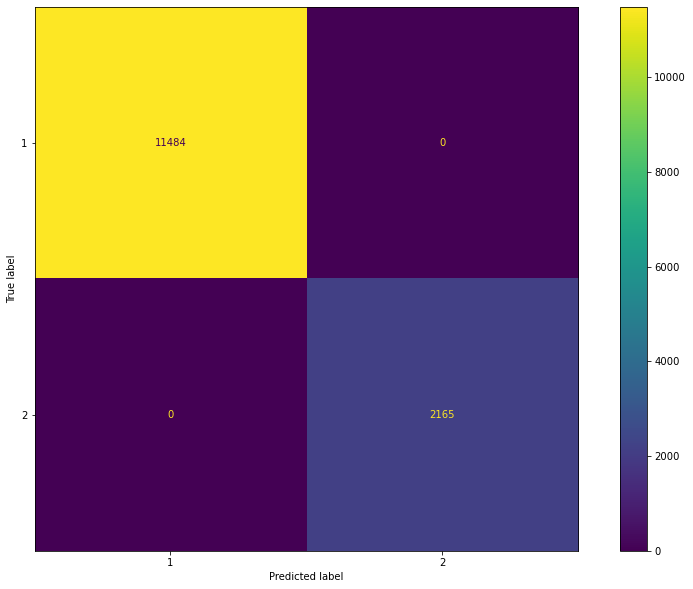

In [116]:
# Create the confusion matrix
plot_confusion_matrix(clf, X_test, y_test)